# Data Science Tools in Python
-----
In this tutorial, you will learn about available software packages in Python which are used by data scientists. The ideal persona for this tutorial is a person who has never used Python and is curious to explore whats available. The idea here is to introduce you to available resources in Python rather than teach you details on how to use as a specific package.  For selected packages, a simple example will be provided to demonstrate usage. Otherwise, most packages will be listed for the leaner to explore in their own time. However, we will use some of the packages in later sessions.

# Table of Contents
- [Learning Outcomes](#Learning Outcomes)
- [General Purpose Data Wrangling](#General Purpose Data Wrangling)
    - [Pandas](#Pandas)
    - [Numpy](#Numpy)
    - [Apache Spark for Large scale data processing](#Apache Spark for Large scale data processing)
- [Web Scraping](#Web Scraping)
- [Natural Language Processing](#Natural Language Processing)
    - [NTLK](#Navigation)
- [Geospatial Data](#Geospatial Data)
    - [GDAL](#GDAL)
    - [Geopandas](#Geopandas)
    - [Shapely](#Shapely)
    - [Rasterio](#Rasterio)
- [Statistical Analysis and Optimisation](#Statistical Analysis and Optimisations)
    - [scipy](#scipy)
    - [Numpy](#Numpy)
    - [statsmodels](#statsmodels)
- [Machine Learning](#Machine Learning)
    - [sciki-learn](#sciki-learn)
    - [Tensorflow](#Tensorflow)
    - [Theano](#Theano)
- [Data Visualization](#Data Visualization)
    - [Matplotlib](#Matplotlib)
    - [Seaborn](#SNS)
    - [Bokeh](#Bokeh)

# Learning Outomes
After going through this notebook, the leaner should:
- Be familiar with  Python packages for the following purposes:
    - Data wrangling
    - Statistical data analysis
    - Data visualization
    - Natural language processing
    - Geospatial data processing and visualization
    - Machine Learning
- Appreciate the Python package ecoystem for data science
- Use import statement to import packages and perfom simple tasks

# General Purpose Data Wrangling
- Back to [Table of Contents](#Table-of-Contents)

In this category, we look at Python libraries which can be used to perfom the most common data wrangling tasks such as data ingestion, data cleaning, subsetting data, recoding variables, checking for missing values, imputing missing values, exploring distributions and more.

## Pandas
- Back to [Table of Contents](#Table-of-Contents)

Pandas is a library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Pandas is free software released under the three-clause BSD license.

### Data Ingestion with Pandas: A Case of CSV file
Pandas can work with many data stores and file formats. To take a quick look at what file formats pandas can read, type ```pd.read``` and then hit tab, you should see a list of all the file formats supported by pandas. In this example, we show reading from a CSV file.

In [2]:
# import the pandas package 
import pandas as pd
import os

# Set the name of the CSV file
data_file = "/Users/dmatekenya/Google-Drive/gigs/un-siap-2018/ch2-python-intro/data/power-outages.csv"

# Read data into dataframe
# dataframe is the pandas object for handling tabular data
df = pd.read_csv(data_file)

### Exploring Data
Once you have read the data, pandas has many functions to allow you explore the data

In [3]:
# View the n-top rows of the data
df.head()

,psu,lon,lat,str_datetime_sent_hr,power_state
0,35,69.075835,38.563905,11/22/16 22:00,0
1,113,69.945693,40.432452,11/22/16 22:00,1
2,140,67.627770,39.499137,11/22/16 22:00,0
3,97,69.756089,38.355409,11/22/16 22:00,0
4,47,70.090710,38.995396,11/22/16 22:00,0


In [ ]:
# Check datatypes and other info about the columns
df.info()

In [ ]:
# Get summary statistics if it makes sense
df.describe()

### Next Steps with Pandas
Please refer to pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/10min.html) for tutorials on how to perfom various tasks such as indexing rows, subsetting the data, chaning column names and more.

## Numpy
- Back to [Table of Contents](#Table-of-Contents)

**Numpy** is one of the underlying libraries which powers many high level packages such as pandas. In most case, you will not need to interact with **Numpy** directly but its an essential package for data manipulation and scientific computing in Python. Its useful for linear algebra, Fourier transform, and random number capabilities because it has advanced array/matrix functionalities. Also, most of the machine learning packages do require input as **Numpy** arrays.

### Arrays in Numpy
In the code below, we show how **Numpy** arrays work seamlessly with pandas dataframes.

In [ ]:
# import Numpy
import numpy as np

# create two arrays
x = np.array([i + 100 for i in range(10)])
y = np.array([i -10 for i in range(10)])

# create a dictionary with key as column name and value as the numpy arrays
data = {"x": x, "y":y}

# Use the dictinary to create a pandas dataframe
df_from_np = pd.DataFrame(data)

# Check out the dataframe
df_from_np.head()

### Check out Numpy Documentation for Additional Details
- Back to [Table of Contents](#Table-of-Contents)

[Numpy documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Parallell Data Processing
- Back to [Table of Contents](#Table-of-Contents)

When you have large datasets regular packages such as pandas do not scale very well. For instance, 
even a 5gb dataset can't be handled gracefully by pandas. When you have these large datasets, 
you look for packages which can parellilze processing and make things faster. In Python, they 
are many tools for parallell data processing as follows:
- [Apache Spark](https://spark.apache.org): this probably the most popular framework for distributed data processing
- [Dask](http://docs.dask.org/en/latest/why.html): This library offers code parallelisation 
    utilising existing libraries such as pandas
- [Python Multiprocessing Library](https://docs.python.org/3.4/library/multiprocessing.html?highlight=process): Python offers a multiprocessing library but it requires people 
    who are more experienced with programming

### The Power of Apache Spark
In the example below, lets see how fast things can get when we use Apache Spark compared to Pandas. Please pay attention to the time taken to process the data.

In [4]:
# A utility function for measuring execution 
from functools import wraps
import time

def timefn(fn):
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = time.time()
        result = fn(*args, **kwargs)
        t2 = time.time()
        print("@timefn:" + fn.__name__ + " took " + str(t2 - t1) + " seconds")
        return result
    return measure_time

In [12]:
# we add @timefn to measure execution time of the function
@timefn
def load_big_csv_with_apache_spark(big_csv=None):
    """
    A simple function which loads a CSV file using Apache Spark and
    then counts how many rows are in the file
    """
    spark = SparkSession.builder.master("local[12]").appName("data_processor").getOrCreate()
    df = spark.read.csv(big_csv)
    cnt = df.count()
    print('Number of rows in big CSV file: {:,}'.format(cnt))

In [10]:
@timefn
def load_big_csv_with_pandas(big_csv=None):
    """
    Use pandas library to load the large CSV
    """
    # Read CSV as a dataframe (df) here
    df = pd.read_csv(big_csv)
    
    # Get the total number of rows
    cnt = df.shape[0]
    print('Done with counting')
    
    # Get total number of unique activities using 'SID' column using code below
    uniq_SID = list(df['SID'].unique())
    print('Done with unique values')
    
    # Use len() function to get number of elements in the list above
    cnt_uniq = len(uniq_SID)
    
    # print out the results
    print('Number of rows in big CSV file: {:,}, Number of unique activities: {}'.format(cnt,cnt_uniq))

In [11]:
# import APache Spark relevant library
from pyspark.sql import SparkSession

# the task is to read in an 8GB CSV file and then count number of rows
big_csv_file = os.path.abspath("/Users/dmatekenya/Google-Drive/gigs/un-siap-2018/ch3-big-data-processing/data/activity_log_raw.csv")
load_big_csv_with_apache_spark(big_csv=big_csv_file)

Number of rows in big CSV file: 194710126
@timefn:load_big_csv_with_apache_spark took 53.48737907409668 seconds


In [13]:
# Load data using pandas
import datetime
start = datetime.datetime.now()
print('Pandas starting now {}'.format(start.ctime()))
load_big_csv_with_pandas(big_csv=big_csv_file)

Pandas starting now Fri Mar  1 10:15:35 2019
Done with counting
Done with unique values
Number of rows in big CSV file: 194,710,125, Number of unique activities: 921
@timefn:load_big_csv_with_pandas took 180.84888792037964 seconds


# Geospatial Data
- Back to [Table of Contents](#Table-of-Contents)

We often have to deal with data which is geospatial in nature or has geographic coordinates. Python has a suite of tools for handling spatial data as we will show in the next section.
- [GDAL](https://www.gdal.org): this is one of the core libraries for provising geospatial data functionality. Most of the other libraries are based on GDAL.
- [Geopandas](http://geopandas.org): A pandas version for geospatial data
- [Shapely](https://shapely.readthedocs.io/en/stable/manual.html): yet another spatial data library with alot of functionalities.
- [Rasterio](https://rasterio.readthedocs.io/en/latest/quickstart.html): this library fosues on raster data

## Reading Shapefiles with GDAL OGR Library
- Back to [Table of Contents](#Table-of-Contents)

GDAL s a translator library for raster and vector geospatial data formats that is released under an X/MIT style Open Source license by the Open Source Geospatial Foundation. Its also used in oen source GIS software such as QGIS. In Python, you can use the library to read raster and vector data as well as manipulate them.

In [14]:
# import package
from osgeo import ogr

# shapefile path
shp_file = os.path.abspath("/Users/dmatekenya/Google-Drive/gigs/un-siap-2018/ch2-python-intro/data/Balaka_EA.shp")

# open shapefile
file = ogr.Open(shp_file)
shape = file.GetLayer(0)

#first feature of the shapefile
feature = shape.GetFeature(0)

# Convert first feature to GeoJSON
first = feature.ExportToJson()

# print the JSON object
print(first)

{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[728565.4020999996, 8362469.5476], [728376.3088999996, 8362466.4587], [728171.9052999998, 8362429.5407], [727998.1657999996, 8362367.9513], [727904.6003, 8362343.3092], [727793.8408000004, 8362295.3796], [727650.5932, 8362198.2983], [727549.0268000001, 8362077.647], [727456.7577, 8361931.3844], [727403.9604000002, 8361825.8879], [727332.1272999998, 8361662.7534], [727272.2296000002, 8361477.1498], [727237.7324999999, 8361301.9728], [727207.2686999999, 8361136.2825], [727176.2799000004, 8360978.2402], [727137.2216999996, 8360760.4787], [727138.1120999996, 8360613.3984], [727158.7296000002, 8360538.1102], [727051.1332, 8360508.6468], [726936.1065999996, 8360560.6619], [726698.6095000003, 8360685.1702], [726541.2703999998, 8360557.0794], [726299.6661999999, 8360653.6469], [726129.8132999996, 8360689.9431], [725987.5976999998, 8360700.3647], [725798.2054000003, 8360673.9498], [725638.1057000002, 8360617.1804], [725464.191

## Displaying Spatial Data with Geopandas
- Back to [Table of Contents](#Table-of-Contents)

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

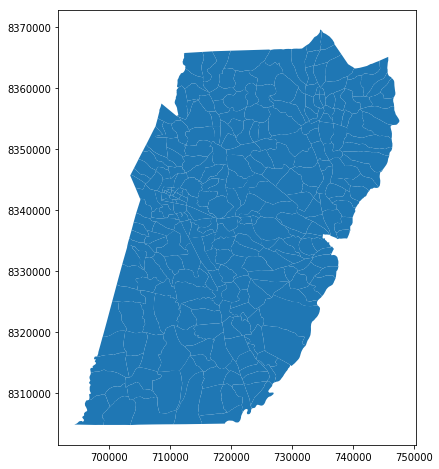

In [17]:
# import geopandas
import geopandas as gpd

# read the shapefile which we arleady defined in cells above
df = gpd.read_file(shp_file)

# diplay the shapefile 
display(df.plot(figsize=(8, 8)))

## Additional Geospatial Data Libraries
- Back to [Table of Contents](#Table-of-Contents)

They are other essential packages to handle spatial data in Python including:
- [Fiona](https://fiona.readthedocs.io/en/stable/): Geopandas uses this library behind the scenes
- [Descartes](https://bitbucket.org/sgillies/descartes/): For spatial data visualization

# Statistical Analysis and Optimisations
- Back to [Table of Contents](#Table-of-Contents)

If you are interested in more sophisticated statistical analysis, Python also offers further tools in addtion to packages like Pandas which also has basic statistical functionalities. Here, we look at the following packages:
- [Statsmodels](https://www.statsmodels.org/stable/index.html): For more rigorous statistical analysis than found in Pandas
- [Scipy](): This is part of the Python scientific computing stack which also includes Numpy
- [Numpy](): Arleady mentioned above

## OLS Estimation with StatsModels

- Back to [Table of Contents](#Table-of-Contents)

Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.Refer to [documentation](https://www.statsmodels.org/stable/index.html) for further details. The example　below has been adopted from StatsModels documentation.

In [20]:
import statsmodels.api as sm
import numpy as np

nsample = 1000
x = np.linspace(0, 10, 1000)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [21]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [22]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.577e+07
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:11:43   Log-Likelihood:                -1404.5
No. Observations:                1000   AIC:                             2815.
Df Residuals:                     997   BIC:                             2830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0088      0.093     10.794      0.0

# Machine Learning in Python
- Back to [Table of Contents](#Table-of-Contents)

Python has become the lingua franca for many data science applications including Machine Learning. It therefore comes as no surprise that its one of the leading scripting langueages when it comes to machine learning. The top machine learning packages in Python based on usage include:
- [scikit-learn](https://scikit-learn.org/stable/): This is a general purpose machine learning library and it can be used for diverse machine tasks unlike other libraries which may be more specialised. 
- [Tensorflow](https://www.tensorflow.org): this library is focused on deep learning and other neural networks approaches
- [Theano](http://deeplearning.net/software/theano/): Also focused on deep learning and neural networks


# Web Scraping
- Back to [Table of Contents](#Table-of-Contents)

A lot of unstructured data is available on the internet. Once gathered and put into a structured & meaningful format, this data can be used to perform analytics and derive meaningful insights. In this tutorial, I am going to demonstrate how we can collect such data from the internet and process it to get it to be in a structured format. This process is known as Web Scraping. It is also called Screen Scraping, Web Harvesting or Web Data Extraction. In Python, they are many packages for web scraping but the most common ones include:
- [requests](http://docs.python-requests.org/en/master/): A library that fetches the content of the URL.
- [Beatifulsoup](https://www.crummy.com/software/BeautifulSoup/): A library that allows you to parse the HTML source code in a beautiful way.
- [Scrapy](https://scrapy.org): An out of the box solution for web scraping with other advanced functionalities

## A Sneak Peak at Requests
- Back to [Table of Contents](#Table-of-Contents)

In [24]:
import requests
from bs4 import BeautifulSoup
# Use request to get contents od webpage
r = requests.get("https://www.kdnuggets.com/2018/02/top-news-week-0129-0204.html")
c = r.content

# And BS to parse the html
soup = BeautifulSoup(c,"html.parser")

# we print a heading three tag
most_pop_last_week = soup.find('h3').text
print(most_pop_last_week)

Most Popular Last Week


# Natural Language Processing
- Back to [Table of Contents](#Table-of-Contents)

Simply and in short, natural language processing (NLP) is about developing applications and services that are able to understand human languages. We are talking here about practical examples of natural language processing (NLP) like speech recognition, speech translation, understanding complete sentences, understanding synonyms of matching words, and writing complete grammatically correct sentences and paragraphs.

In Python, there are many libraries for dealing with language and textual data, we preview some of them:
 - [Natural language toolkit (NLTK](https://www.nltk.org): A library for general purpose processing and analysis of human language data.
 - [TextBlob](https://textblob.readthedocs.io/en/dev/):Built on top of NLTK above, this package provides similar natural language functionality
 - [spaCy](https://spacy.io): Optmised for large scale processing of natural language data.
 - [Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/): An old NLP package written in Java but it has some Python APIs such as [py-corenlp](https://github.com/smilli/py-corenlp/)

## A taste of NLTK on Twitter Data
Lets quickly look at this twitter dataset from [datahack](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/) just to demonstrate how language processing is possible in Python.

In [25]:
# As usual, we have to import the package
from nltk.corpus import stopwords
import nltk

# When running for the first time, please uncomment line beloe to donwload the extra packages
# nltk.download('punkt') 


# path to data file
twitter_data = os.path.abspath("/Users/dmatekenya/Google-Drive/gigs/un-siap-2018/ch2-python-intro/data/twitter-dataset-from-datahack.csv")

# Get CSV
df_twitter = pd.read_csv(twitter_data)

# One preprocessing steps in NLP is tokenizing (converting sentences into separate words)
df_twitter['tokens'] = df_twitter.apply(lambda x: nltk.word_tokenize(x['tweet']), axis=1)

# Lets check the split tweets
df_twitter.head()

,id,label,tweet,tokens
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the..."
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]"


## Simple Translation with TextBlob
- Back to [Table of Contents](#Table-of-Contents)

Translation is one of the common tasks in NLP. Many APIs provide translation, for example, you can use Google API to tranlate texts on demand for free or for a charge depending on the bulk of your translations. However, in Python the NLP libraries also enable you to translate as we will see in exmaple below.

In [26]:
from textblob import TextBlob

chinese_blob = TextBlob(u"美丽优于丑陋")
chinese_blob.translate(from_lang="zh-CN", to='en')

TextBlob("Beauty is better than ugly")

# Data Visualization
- Back to [Table of Contents](#Table-of-Contents)

Python has many data visualisation tools, here are some of them:
- [Matplotlib]() : this is the base plotting engine in Python. Most of the other packages are somehow based on it.
- [Seaborn](): A relatively new packahe with more colourful plots
- [Bokeh](): this is an interactive visualization library that targets modern web browsers for presentation.

## Interactive Visualisations with Bokeh

The simple interactive example below has been copied from [Bokeh Documentation] (https://demo.bokehplots.com/apps/moviesfrom) for demonstration.

In [27]:
from bokeh.plotting import figure, show, output_file

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

# please inspect the plot in the browser
show(p)

# Summary

- Back to [Table of Contents](#Table-of-Contents)

In this tutorial, we previewed some of the essential packages in Python for doing data science with the intent to get excited to learn more. You can always learn more about any of the packages mentioned here by going to the documentation page linked or doing a Google search.